In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, hessian
import time

## Method implementation

In [3]:
# Gradient descent 
def gradient_descent(grad, x_start, gamma=0.001, n_iters=100000, eps=1e-7, timer = 1e10, return_time = False):
    start = time.perf_counter()
    x_k = np.array(x_start)

    for i in range(n_iters):
        if time.perf_counter() - start > timer:
            return x_k, i+1


        if np.linalg.norm(grad(x_k)) * gamma   < eps:
            if return_time:
                return x_k,i +1, time.perf_counter() - start
            return x_k,i 
        
        x_k = x_k - gamma * grad(x_k)

    if return_time:
        return x_k,i +1, time.perf_counter() - start
    return x_k, i +1

In [4]:
# polyak gradient descent
def polyak_gd(grad, x_start, gamma=0.001, mew=0.1, n_iters=100000, eps=1e-7, stop=True, timer = 1e10, return_time = False):
    start = time.perf_counter()
    x_k = np.array(x_start)
    x_prev_2 = [0,0]

    for i in range(n_iters):
        if time.perf_counter() - start > timer:
            return x_k, i +1
        
        x_prev_2[1] = x_prev_2[0]
        x_prev_2[0] = x_k
        
        if np.linalg.norm(grad(x_k)) * gamma  < eps and stop:
            if return_time:
                return x_k,i +1, time.perf_counter() - start
            
            return x_k,i 
        
        x_k = x_k - gamma * grad(x_k)
        if i > 0:
            x_k = x_k + mew * (x_prev_2[0] - x_prev_2[1])
            
    if return_time:
        return x_k,i +1, time.perf_counter() - start
    return x_k,i +1

In [5]:
# nesterov gradient descent
def nesterov_gd(grad, x_start, gamma=0.001, mew=0.1, n_iters=100000, eps=1e-7, stop=True, timer = 1e10, return_time = False):
    start = time.perf_counter()
    
    x_k = np.array(x_start)
    x_prev_2 = [0,0]

    for i in range(n_iters):
        if time.perf_counter() - start > timer:
            return x_k,i 
        
        x_prev_2[1] = x_prev_2[0]
        x_prev_2[0] = x_k

        if np.linalg.norm(grad(x_k))  * gamma < eps and stop:
            if return_time:
                return x_k,i +1, time.perf_counter() - start
            return x_k,i 
        
        x_k = x_k - gamma * grad(x_k + mew*(x_prev_2[0] - x_prev_2[1]))

        if i > 0:
            x_k = x_k + mew * (x_prev_2[0] - x_prev_2[1])
            
    if return_time:
        return x_k,i +1, time.perf_counter() - start
    
    return x_k,i +1

In [62]:
# Simulation for the first theoretical problem 
def fun1(x):
    return x**2
def gradient1(x):
    return 2 * x

def fun2(x):
    if x== 0:
        return 0
    elif x < 0:
        return x
    else: 
        return -x
def gradient2(x):
    if x == 0:
        return 0
    if x > 0:
        return 1
    if x < 0:
        return -1
    
for i in range(1,100):
    #print(f"GD: {gradient_descent(gradient1, -1, 1, n_iters=i)}")
    #print(f"polyak: {polyak_gd(gradient1,-1,3/2,1, n_iters=i, stop=False)}")
    print(f"nesterov: {nesterov_gd(gradient1,-1,3/2,-1/2, n_iters=i, stop=False)}")


nesterov: (np.float64(0.5), 1)
nesterov: (np.float64(0.5), 2)
nesterov: (np.float64(-1.0), 3)
nesterov: (np.float64(0.5), 4)
nesterov: (np.float64(0.5), 5)
nesterov: (np.float64(-1.0), 6)
nesterov: (np.float64(0.5), 7)
nesterov: (np.float64(0.5), 8)
nesterov: (np.float64(-1.0), 9)
nesterov: (np.float64(0.5), 10)
nesterov: (np.float64(0.5), 11)
nesterov: (np.float64(-1.0), 12)
nesterov: (np.float64(0.5), 13)
nesterov: (np.float64(0.5), 14)
nesterov: (np.float64(-1.0), 15)
nesterov: (np.float64(0.5), 16)
nesterov: (np.float64(0.5), 17)
nesterov: (np.float64(-1.0), 18)
nesterov: (np.float64(0.5), 19)
nesterov: (np.float64(0.5), 20)
nesterov: (np.float64(-1.0), 21)
nesterov: (np.float64(0.5), 22)
nesterov: (np.float64(0.5), 23)
nesterov: (np.float64(-1.0), 24)
nesterov: (np.float64(0.5), 25)
nesterov: (np.float64(0.5), 26)
nesterov: (np.float64(-1.0), 27)
nesterov: (np.float64(0.5), 28)
nesterov: (np.float64(0.5), 29)
nesterov: (np.float64(-1.0), 30)
nesterov: (np.float64(0.5), 31)
nestero

In [7]:
def adagrad_gd(grad, x_start, gamma=0.001,n_iters=100000, eps=1e-7, timer = 1e7, return_time = False):
    start = time.perf_counter()
    x_k = np.array(x_start)

    #initialize matrix D
    d = np.zeros(shape=len(x_start))

    for i in range(n_iters):
        if time.perf_counter() - start > timer:
            return x_k, i +1
        
        d += grad(x_k)**2

        D = 1/(np.sqrt(np.diag(d)+ 1e-7))
        D[np.triu_indices_from(D, 1)] = 0
        D[np.tril_indices_from(D,-1)] = 0

        if np.linalg.norm( gamma *grad(x_k) @ D)< eps:
            if return_time:
                return x_k,i +1, time.perf_counter() - start
            return x_k, i
 
        x_k = x_k - gamma * grad(x_k) @ D
    if return_time:
        return x_k,i +1, time.perf_counter() - start
    return x_k, i +1

In [8]:
# Newton method
def newton(grad,hessian, x_start, n_iters=100000, eps=1e-7, gamma=1, timer = 1e7, return_time = False):
    start = time.perf_counter()
    x_k = np.array(x_start)

    for i in range(n_iters):
        if time.perf_counter() - start > timer:
            return x_k, i +1
        
        if np.linalg.norm(np.linalg.inv(hessian(x_k)) @ grad(x_k) * gamma)  < eps:
            if return_time:
                return x_k,i +1, time.perf_counter() - start
            return x_k,i 
        
        x_k = x_k - np.linalg.inv(hessian(x_k)) @ grad(x_k) * gamma
    if return_time:
        return x_k,i +1, time.perf_counter() - start
    return x_k, i +1

In [ ]:
# BFGS 
def bfgs(grad, x_start, n_iters=100000, eps=1e-7, gamm=1, timer = 1e7, return_time = False):
    start = time.perf_counter()
    x_k = np.array(x_start)
    grads = [grad(x_k)]
    x_ks = [x_k]
    B = np.eye(len(x_start)) # Start with GD

    for i in range(n_iters):
        if time.perf_counter() - start > timer:
            return x_k, i +1

        if np.linalg.norm( B @ grads[-1] * gamm)  < eps:

            if return_time:
                return x_k,i +1, time.perf_counter() - start
            
            return x_k,i +1
        
        x_k = x_k - B @ grads[-1] * gamm
        delta = x_k - x_ks[-1]
        grads.append(grad(x_k))
        gamma = grads[-1] - grads[-2]
        delta = delta.reshape(-1, 1)
        gamma = gamma.reshape(-1, 1)

        denom = delta.T @ gamma
        term1 = (1 + (gamma.T @ B @ gamma) / denom) * (delta @ delta.T) / denom
        term2 = (B @ gamma @ delta.T + delta @ gamma.T @ B) / denom

        B = B + term1 - term2
        x_ks.append(x_k)

    if return_time:
        return x_k,i +1, time.perf_counter() - start
    return x_k, i +1

In [10]:
def l_bfgs(grad, x_start, m = 10, n_iters=100000, eps=1e-7, gamm=1, timer = 1e7, return_time = False):
    start = time.perf_counter()
    x_k = np.array(x_start)
    grads = [grad(x_k)]
    x_ks = [x_k]
    gammas = []
    deltas = []
    rhos = []

    for k in range(n_iters):

        if time.perf_counter() - start > timer:
            return x_k, k+1
        
        
        alphas = []
        q = grads[-1].copy()
        x_k = x_ks[-1].copy()
        
        for i in reversed(range(len(deltas))):
            alphas.append(rhos[i] * deltas[i].T @ q)
            q -= alphas[-1] * gammas[i]

        if len(deltas) > 0:
            B_tilde = (deltas[-1].T @ gammas[-1]) / (gammas[-1].T @ gammas[-1] + 1e-7)
        else:
            B_tilde = 1.0

        r = B_tilde * q

        alphas = alphas[::-1]
        for i in range(len(deltas)):
            beta = rhos[i] * gammas[i].T @ r
            r += deltas[i] * (alphas[i] - beta)

        x_k_new = x_k - r * gamm

        if np.linalg.norm(x_k_new - x_k) < eps:
             return x_k, k+1
        grad_next = grad(x_k_new)

        deltas.append(x_k_new - x_k)
        gammas.append(grad_next - grads[-1])
        rhos.append(1.0 / (gammas[-1].T @ deltas[-1] + 1e-7))

        if len(deltas) > m:
            deltas.pop(0)
            gammas.pop(0)
            rhos.pop(0)

        x_ks.append(x_k_new)
        grads.append(grad_next)

    if return_time:
        return x_k,k +1, time.perf_counter() - start

    return x_k, n_iters


## The three functions

In [11]:
# Function 1 
def f1(x):
    return (x[0] - x[2])**2 + (2*x[1] + x[2])**2 + (4*x[0] - 2*x[1] + x[2])**2 + x[0] + x[1]


# Get the gradient  and hessian
x, y, z = symbols('x y z')
f = (x - z)**2 + (2*y + z)**2 + (4*x - 2*y + z)**2 + x + y

grad = [diff(f, var) for var in (x, y, z)]
H = hessian(f, (x, y, z))

print("Gradient:", grad)
print("Hessian:", H)


def grad1(x):
    return np.array([
        2*(x[0] - x[2]) + 8*(4*x[0] - 2*x[1] + x[2]) + 1,
        4*(2*x[1] + x[2]) - 4*(4*x[0] - 2*x[1] + x[2]) + 1,
        6*x[0] + 6*x[2]
    ])

def hessian1(x):
    return np.array([[34, -16, 6], [-16, 16, 0], [6, 0, 6]])


Gradient: [34*x - 16*y + 6*z + 1, -16*x + 16*y + 1, 6*x + 6*z]
Hessian: Matrix([[34, -16, 6], [-16, 16, 0], [6, 0, 6]])


In [12]:
# Testing number of steps performance 
for steps in [2, 5, 10,100]:
    print(f"-------------------steps: {steps} -------------------")
    for starting_point in [[0, 0, 0], [1, 1, 0]]:
        print(f"-------------------starting point: {starting_point} -------------------")

        # Gradient Descent
        x_gd, n_gd = gradient_descent(grad1, starting_point, n_iters=steps, gamma=0.001)
        print("GD:       f1 =", f1(x_gd), ", x =", x_gd, ", iterations =", n_gd)

        # Polyak GD
        x_pg, n_pg = polyak_gd(grad1, starting_point, n_iters=steps, gamma=0.001, mew=0.5)
        print("Polyak:   f1 =", f1(x_pg), ", x =", x_pg, ", iterations =", n_pg)

        # Nesterov GD
        x_ngd, n_ngd = nesterov_gd(grad1, starting_point, n_iters=steps, gamma=0.001, mew=0.5)
        print("Nesterov: f1 =", f1(x_ngd), ", x =", x_ngd, ", iterations =", n_ngd)

        # AdaGrad
        x_ad, n_ad = adagrad_gd(grad1, starting_point, n_iters=steps, gamma=1)
        print("AdaGrad:  f1 =", f1(x_ad), ", x =", x_ad, ", iterations =", n_ad)

        # Newton
        x_new, n_new = newton(grad1, hessian1, starting_point, n_iters=steps)
        print("Newton:   f1 =", f1(x_new), ", x =", x_new, ", iterations =", n_new)

        # BFGS
        x_bfgs, n_bfgs = bfgs(grad1, starting_point, n_iters=steps)
        print("Bfgs:     f1 =", f1(x_bfgs), ", x =", x_bfgs, ", iterations =", n_bfgs)

        # L-BFGS
        x_lbfgs, n_lbfgs = l_bfgs(grad1, starting_point, m=10, n_iters=steps)
        print("l_Bfgs:   f1 =", f1(x_lbfgs), ", x =", x_lbfgs, ", iterations =", n_lbfgs)


-------------------steps: 2 -------------------
-------------------starting point: [0, 0, 0] -------------------
GD:       f1 = -0.003946713736 , x = [-1.982e-03 -2.000e-03  6.000e-06] , iterations = 2
Polyak:   f1 = -0.004926643736 , x = [-2.482e-03 -2.500e-03  6.000e-06] , iterations = 2
Nesterov: f1 = -0.004918085906 , x = [-2.473e-03 -2.500e-03  9.000e-06] , iterations = 2
AdaGrad:  f1 = 24.547439597654478 , x = [-0.00172558 -1.70710671  1.        ] , iterations = 2
Newton:   f1 = -0.19791666666666663 , x = [-0.16666667 -0.22916667  0.16666667] , iterations = 1
Bfgs:     f1 = -0.11135522666666665 , x = [-1.11133333e-01 -1.11333333e-01  6.66666667e-05] , iterations = 2
l_Bfgs:   f1 = 7.0 , x = [-1. -1.  0.] , iterations = 2
-------------------starting point: [1, 1, 0] -------------------
GD:       f1 = 10.242711939832 , x = [ 0.962666  0.997712 -0.01185 ] , iterations = 2
Polyak:   f1 = 10.058361689832 , x = [ 0.953166  0.997212 -0.01485 ] , iterations = 2
Nesterov: f1 = 9.816307692

In [13]:
# Testing number of steps performance with timer parameter
for timer in [0.1, 1, 2]:
    print(f"-------------------timer: {timer} -------------------")
    for starting_point in [[0, 0, 0], [1, 1, 0]]:
        print(f"-------------------starting point: {starting_point} -------------------")
        
        # Gradient Descent
        x_gd, n_gd = gradient_descent(grad1, starting_point, timer=timer, gamma=0.001)
        print(f"GD:       f1 = {f1(x_gd)} , iterations = {n_gd}, timer = {timer}")

        # Polyak GD
        x_pg, n_pg = polyak_gd(grad1, starting_point, timer=timer, gamma=0.001, mew=0.5)
        print(f"Polyak:   f1 = {f1(x_pg)} , iterations = {n_pg}, timer = {timer}")

        # Nesterov GD
        x_ngd, n_ngd = nesterov_gd(grad1, starting_point, timer=timer, gamma=0.001, mew=0.5)
        print(f"Nesterov: f1 = {f1(x_ngd)} , iterations = {n_ngd}, timer = {timer}")

        # AdaGrad
        x_ad, n_ad = adagrad_gd(grad1, starting_point, timer=timer, gamma=1)
        print(f"AdaGrad:  f1 = {f1(x_ad)} , iterations = {n_ad}, timer = {timer}")

        # Newton
        x_new, n_new = newton(grad1, hessian1, starting_point, timer=timer)
        print(f"Newton:   f1= {f1(x_new)} , iterations = {n_new}, timer = {timer}")

        # bfgs
        x_bfgs, n_bfgs = bfgs(grad1, starting_point, timer=timer)
        print(f"Bfgs:     f1= {f1(x_bfgs)} , iterations = {n_bfgs}, timer = {timer}")

        # l_bfgs
        x_lbfgs, n_lbfgs = l_bfgs(grad1, starting_point, m=20, timer=timer)
        print(f"l_Bfgs:   f1= {f1(x_lbfgs)} , iterations = {n_lbfgs}, timer = {timer}")


-------------------timer: 0.1 -------------------
-------------------starting point: [0, 0, 0] -------------------
GD:       f1 = -0.19791666494629392 , iterations = 3142, timer = 0.1
Polyak:   f1 = -0.19791666495558638 , iterations = 1561, timer = 0.1
Nesterov: f1 = -0.19791666494364754 , iterations = 1565, timer = 0.1
AdaGrad:  f1 = -0.197916666665909 , iterations = 101, timer = 0.1
Newton:   f1= -0.19791666666666663 , iterations = 1, timer = 0.1
Bfgs:     f1= -0.19791666666662627 , iterations = 20, timer = 0.1
l_Bfgs:   f1= -0.1979166666666609 , iterations = 8, timer = 0.1
-------------------starting point: [1, 1, 0] -------------------
GD:       f1 = -0.19791666494359375 , iterations = 3611, timer = 0.1
Polyak:   f1 = -0.197916664957172 , iterations = 1794, timer = 0.1
Nesterov: f1 = -0.19791666493893267 , iterations = 1798, timer = 0.1
AdaGrad:  f1 = -0.197916666666161 , iterations = 79, timer = 0.1
Newton:   f1= -0.19791666666666666 , iterations = 1, timer = 0.1
Bfgs:     f1= -0.

In [14]:
# Function 2 
def f2(x):
    return (x[0] - 1)**2 + (x[1] - 1)**2 + 100* (x[1] - x[0]**2)**2 + 100* (x[2] - x[1]**2)**2

# Get the gradient  and hessian
x, y, z = symbols('x y z')
f = (x - 1)**2 + (y - 1)**2 + 100 * (y - x**2)**2 + 100 * (z - y**2)**2

grad = [diff(f, var) for var in (x, y, z)]
H = hessian(f, (x, y, z))

print("Gradient:", grad)
print("Hessian:", H)

def grad2(x):
    return np.array([2*(x[0] -1) - 400 * x[0] * (x[1] - x[0]**2),
              2*(x[1] - 1) + 200*(x[1] - x[0]**2) - 400 * x[1]*(x[2]- x[1]**2),
              100 * (x[2] - x[1]**2)])

def hessian2(x):
    return np.array([[1200 * x[0] ** 2 - 400 * x[1] + 2, -400 * x[0], 0],
              [-400 * x[0], 1200 * x[1] ** 2 - 400 * x[2] + 202, -400 * x[1]],
              [0, -400 * x[1], 200]])


Gradient: [-400*x*(-x**2 + y) + 2*x - 2, -200*x**2 - 400*y*(-y**2 + z) + 202*y - 2, -200*y**2 + 200*z]
Hessian: Matrix([[1200*x**2 - 400*y + 2, -400*x, 0], [-400*x, 1200*y**2 - 400*z + 202, -400*y], [0, -400*y, 200]])


In [15]:
# Testing number of steps performance for f2, grad2
for steps in [2, 5, 10, 100]:
    print(f"-------------------steps: {steps} -------------------")
    for starting_point in [[1.2, 1.2, 1.2], [-1, 1.2, 1.2]]:
        print(f"-------------------starting point: {starting_point} -------------------")
        
        # Gradient Descent
        x_gd, n_gd = gradient_descent(grad2, starting_point, n_iters=steps, gamma=0.001)
        print(f"GD:       f2 = {f2(x_gd)} , iterations = {n_gd}")

        # Polyak GD
        x_pg, n_pg = polyak_gd(grad2, starting_point, n_iters=steps, gamma=0.001, mew=0.5)
        print(f"Polyak:   f2 = {f2(x_pg)} , iterations = {n_pg}")

        # Nesterov GD
        x_ngd, n_ngd = nesterov_gd(grad2, starting_point, n_iters=steps, gamma=0.001, mew=0.5)
        print(f"Nesterov: f2 = {f2(x_ngd)} , iterations = {n_ngd}")

        # AdaGrad
        x_ad, n_ad = adagrad_gd(grad2, starting_point, n_iters=steps, gamma=1)
        print(f"AdaGrad:  f2 = {f2(x_ad)} , iterations = {n_ad}")

        # Newton
        x_new, n_new = newton(grad2, hessian2, starting_point, n_iters=steps)
        print(f"Newton:   f2 = {f2(x_new)} , iterations = {n_new}")

        # bfgs
        x_bfgs, n_bfgs = bfgs(grad2, starting_point, n_iters=steps)
        print(f"Bfgs:     f2 = {f2(x_bfgs)} , iterations = {n_bfgs}")

        # bfgs
        x_lbfgs, n_lbfgs = l_bfgs(grad2, starting_point, n_iters=steps, m=10)
        print(f"l_Bfgs:     f2 = {f2(x_lbfgs)} , iterations = {n_lbfgs}")

-------------------steps: 2 -------------------
-------------------starting point: [1.2, 1.2, 1.2] -------------------
GD:       f2 = 0.07425436419198667 , iterations = 2
Polyak:   f2 = 0.9840360282392253 , iterations = 2
Nesterov: f2 = 160.9208866766212 , iterations = 2
AdaGrad:  f2 = 100.21139241976825 , iterations = 2
Newton:   f2 = 8.246077899613864 , iterations = 2
Bfgs:     f2 = 0.2435037963592503 , iterations = 2
l_Bfgs:     f2 = 19223893247.43999 , iterations = 2
-------------------starting point: [-1, 1.2, 1.2] -------------------
GD:       f2 = 4.932075736873774 , iterations = 2
Polyak:   f2 = 6.621329558018571 , iterations = 2
Nesterov: f2 = 172.85382740800048 , iterations = 2
AdaGrad:  f2 = 11.546903663517028 , iterations = 2
Newton:   f2 = 17.5258931051153 , iterations = 2
Bfgs:     f2 = 4.226511526402861 , iterations = 2
l_Bfgs:     f2 = 60412227439.719955 , iterations = 2
-------------------steps: 5 -------------------
-------------------starting point: [1.2, 1.2, 1.2] -

In [16]:
# Testing number of steps performance for f2, grad2 with timer parameter
for timer in [0.1, 1, 2]:
    print(f"-------------------timer: {timer} -------------------")
    for starting_point in [[1.2, 1.2, 1.2], [-1, 1.2, 1.2]]:
        print(f"-------------------starting point: {starting_point} -------------------")
        
        # Gradient Descent
        x_gd, n_gd = gradient_descent(grad2, starting_point, timer=timer, gamma=0.001)
        print(f"GD:       f2 = {f2(x_gd)} , iterations = {n_gd}")

        # Polyak GD
        x_pg, n_pg = polyak_gd(grad2, starting_point, timer=timer, gamma=0.001, mew=0.5)
        print(f"Polyak:   f2 = {f2(x_pg)} , iterations = {n_pg}")

        # Nesterov GD
        x_ngd, n_ngd = nesterov_gd(grad2, starting_point, timer=timer, gamma=0.001, mew=0.5)
        print(f"Nesterov: f2 = {f2(x_ngd)} , iterations = {n_ngd}")

        # AdaGrad
        x_ad, n_ad = adagrad_gd(grad2, starting_point, timer=timer, gamma=1)
        print(f"AdaGrad:  f2 = {f2(x_ad)} , iterations = {n_ad}")

        # Newton
        x_new, n_new = newton(grad2, hessian2, starting_point, timer=timer)
        print(f"Newton:   f2 = {f2(x_new)} , iterations = {n_new}")

        # bfgs
        x_bfgs, n_bfgs = bfgs(grad2, starting_point, timer=timer)
        print(f"Bfgs:     f2 = {f2(x_bfgs)} , iterations = {n_bfgs}")

        # bfgs
        x_lbfgs, n_lbfgs = l_bfgs(grad2, starting_point, timer=timer, m=10)
        print(f"l Bfgs:     f2 = {f2(x_lbfgs)} , iterations = {n_lbfgs}")

        


-------------------timer: 0.1 -------------------
-------------------starting point: [1.2, 1.2, 1.2] -------------------
GD:       f2 = 7.796707888758792e-05 , iterations = 10489
Polyak:   f2 = 1.069111238796211e-06 , iterations = 9196
Nesterov: f2 = 2.2484004275511094e-05 , iterations = 8091
AdaGrad:  f2 = 0.02173978794850767 , iterations = 1175
Newton:   f2 = 0.18786153170912617 , iterations = 3049
Bfgs:     f2 = 1.939113520712414e-15 , iterations = 319
l Bfgs:     f2 = 5.161205762726945e-11 , iterations = 369
-------------------starting point: [-1, 1.2, 1.2] -------------------
GD:       f2 = 0.0017076349061647968 , iterations = 10837
Polyak:   f2 = 2.93239157512179e-05 , iterations = 9066
Nesterov: f2 = 1.8470870972262978e-05 , iterations = 7922
AdaGrad:  f2 = 3.014975759011788 , iterations = 1301
Newton:   f2 = 0.2205264226769313 , iterations = 3086
Bfgs:     f2 = 4.70937250035258e-16 , iterations = 188
l Bfgs:     f2 = 2.2550076249163636e-08 , iterations = 509
-------------------

In [17]:
# function 3
def f3(x):
    return (1.5 - x[0] + x[0] * x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0] * x[1]**3)**2

# Get the gradient  and hessian
x, y = symbols('x y')
f = (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

grad = [diff(f, var) for var in (x, y)]
H = hessian(f, (x, y))

print("Gradient:", grad)
print("Hessian:", H)

def grad3(x):
    grad_x = 2 * (1.5 - x[0] + x[0]*x[1]) * (-1 + x[1]) + 2 * (2.25 - x[0] + x[0]*x[1]**2) * (-1 + x[1]**2) + 2 * (2.625 - x[0] + x[0]*x[1]**3) * (-1 + x[1]**3)
    grad_y = 2 * (1.5 - x[0] + x[0]*x[1]) * x[0] + 2 * (2.25 - x[0] + x[0]*x[1]**2) * 2 * x[0] * x[1] + 2 * (2.625 - x[0] + x[0]*x[1]**3) * 3 * x[0] * x[1]**2
    return np.array([grad_x, grad_y])

def hessian3(x):
    return  np.array([
    [
        2.25 * (2/3 * x[1] - 2/3) * (4/3 * x[1] - 4/3) + 5.0625 * (4/9 * x[1]**2 - 4/9) * (8/9 * x[1]**2 - 8/9) + 6.890625 * (8/21 * x[1]**3 - 8/21) * (16/21 * x[1]**3 - 16/21),
        7.875 * x[0] * x[1]**2 * (16/21 * x[1]**3 - 16/21) + 4.5 * x[0] * x[1] * (8/9 * x[1]**2 - 8/9) + 2.0 * x[0] * x[1] + 1.5 * x[0] * (4/3 * x[1] - 4/3) - 2.0 * x[0] + 15.75 * x[1]**2 * (8/21 * x[0] * x[1]**3 - 8/21 * x[0] * x[1] + 1) + 9.0 * x[1] * (4/9 * x[0] * x[1]**2 - 4/9 * x[0] * x[1] + 1) + 3.0
    ],
    [
        7.875 * x[0] * x[1]**2 * (16/21 * x[1]**3 - 16/21) + 4.5 * x[0] * x[1] * (8/9 * x[1]**2 - 8/9) + 2.0 * x[0] * x[1] + 1.5 * x[0] * (4/3 * x[1] - 4/3) - 2.0 * x[0] + 15.75 * x[1]**2 * (8/21 * x[0] * x[1]**3 - 8/21 * x[0] * x[1] + 1) + 9.0 * x[1] * (4/9 * x[0] * x[1]**2 - 4/9 * x[0] * x[1] + 1) + 3.0,
        18.0 * x[0]**2 * x[1]**4 + 8.0 * x[0]**2 * x[1]**2 + 2.0 * x[0]**2 + 31.5 * x[0] * x[1] * (8/21 * x[0] * x[1]**3 - 8/21 * x[0] * x[1] + 1) + 9.0 * x[0] * (4/9 * x[0] * x[1]**2 - 4/9 * x[0] * x[1] + 1)
    ]
])


Gradient: [2.25*(1.33333333333333*y - 1.33333333333333)*(0.666666666666667*x*y - 0.666666666666667*x + 1) + 5.0625*(0.888888888888889*y**2 - 0.888888888888889)*(0.444444444444444*x*y**2 - 0.444444444444444*x + 1) + 6.890625*(0.761904761904762*y**3 - 0.761904761904762)*(0.380952380952381*x*y**3 - 0.380952380952381*x + 1), 15.75*x*y**2*(0.380952380952381*x*y**3 - 0.380952380952381*x + 1) + 9.0*x*y*(0.444444444444444*x*y**2 - 0.444444444444444*x + 1) + 3.0*x*(0.666666666666667*x*y - 0.666666666666667*x + 1)]
Hessian: Matrix([[2.25*(0.666666666666667*y - 0.666666666666667)*(1.33333333333333*y - 1.33333333333333) + 5.0625*(0.444444444444444*y**2 - 0.444444444444444)*(0.888888888888889*y**2 - 0.888888888888889) + 6.890625*(0.380952380952381*y**3 - 0.380952380952381)*(0.761904761904762*y**3 - 0.761904761904762), 7.875*x*y**2*(0.761904761904762*y**3 - 0.761904761904762) + 4.5*x*y*(0.888888888888889*y**2 - 0.888888888888889) + 2.0*x*y + 1.5*x*(1.33333333333333*y - 1.33333333333333) - 2.0*x + 15

In [27]:
# Testing number of steps performance for f3, grad3 with different steps
for steps in [2, 5, 10, 100]:
    print(f"-------------------steps: {steps} -------------------")
    for starting_point in [[1, 1], [4.5, 4.5]]:
        print(f"-------------------starting point: {starting_point} -------------------")
        
        # Gradient Descent
        x_gd, n_gd = gradient_descent(grad3, starting_point, n_iters=steps, gamma=0.000001)
        print(f"GD:       f3 = {f3(x_gd)} , iterations = {n_gd}")

        # Polyak GD
        x_pg, n_pg = polyak_gd(grad3, starting_point, n_iters=steps, gamma=0.00000001, mew=1)
        print(f"Polyak:   f3 = {f3(x_pg)} , iterations = {n_pg}")

        # Nesterov GD
        x_ngd, n_ngd = nesterov_gd(grad3, starting_point, n_iters=steps, gamma=0.0001, mew=0.5)
        print(f"Nesterov: f3 = {f3(x_ngd)} , iterations = {n_ngd}")

        # AdaGrad
        x_ad, n_ad = adagrad_gd(grad3, starting_point, n_iters=steps, gamma=1)
        print(f"AdaGrad:  f3 = {f3(x_ad)} , iterations = {n_ad}")

        # Newton
        x_new, n_new = newton(grad3, hessian3, starting_point, n_iters=steps)
        print(f"Newton:   f3 = {f3(x_new)} , iterations = {n_new}")

        # bfgs
        x_bfgs, n_bfgs = bfgs(grad3, starting_point, n_iters=steps)
        print(f"Bfgs:     f3 = {f3(x_bfgs)} , iterations = {n_bfgs}")

        # l_bfgs
        x_lbfgs, n_lbfgs = l_bfgs(grad3, starting_point, m=10, n_iters=steps)
        print(f"l_Bfgs:   f3 = {f3(x_lbfgs)} , iterations = {n_lbfgs}")


-------------------steps: 2 -------------------
-------------------starting point: [1, 1] -------------------
GD:       f3 = 14.201585033233027 , iterations = 2
Polyak:   f3 = 14.203101898154014 , iterations = 2
Nesterov: f3 = 13.45786898371042 , iterations = 2
AdaGrad:  f3 = 0.781524854041658 , iterations = 2
Newton:   f3 = 14.203125 , iterations = 1
Bfgs:     f3 = 7.116086902015509 , iterations = 2
l_Bfgs:   f3 = 366841548.70532227 , iterations = 2
-------------------starting point: [4.5, 4.5] -------------------
GD:       f3 = 94564.94335545086 , iterations = 2
Polyak:   f3 = 173050.04346714864 , iterations = 2
Nesterov: f3 = 1.4395009210137446e+121 , iterations = 2
AdaGrad:  f3 = 16211.099477299336 , iterations = 2
Newton:   f3 = 14223.37103458731 , iterations = 2
Bfgs:     f3 = 84329398933.15385 , iterations = 2
l_Bfgs:   f3 = 8.924513434134956e+41 , iterations = 2
-------------------steps: 5 -------------------
-------------------starting point: [1, 1] -------------------
GD:    

C:\Users\marko\AppData\Local\Temp\ipykernel_9184\2639107550.py:16: RuntimeWarning: overflow encountered in scalar multiply
  grad_x = 2 * (1.5 - x[0] + x[0]*x[1]) * (-1 + x[1]) + 2 * (2.25 - x[0] + x[0]*x[1]**2) * (-1 + x[1]**2) + 2 * (2.625 - x[0] + x[0]*x[1]**3) * (-1 + x[1]**3)
C:\Users\marko\AppData\Local\Temp\ipykernel_9184\2639107550.py:16: RuntimeWarning: overflow encountered in scalar power
  grad_x = 2 * (1.5 - x[0] + x[0]*x[1]) * (-1 + x[1]) + 2 * (2.25 - x[0] + x[0]*x[1]**2) * (-1 + x[1]**2) + 2 * (2.625 - x[0] + x[0]*x[1]**3) * (-1 + x[1]**3)
C:\Users\marko\AppData\Local\Temp\ipykernel_9184\2639107550.py:17: RuntimeWarning: overflow encountered in scalar multiply
  grad_y = 2 * (1.5 - x[0] + x[0]*x[1]) * x[0] + 2 * (2.25 - x[0] + x[0]*x[1]**2) * 2 * x[0] * x[1] + 2 * (2.625 - x[0] + x[0]*x[1]**3) * 3 * x[0] * x[1]**2
C:\Users\marko\AppData\Local\Temp\ipykernel_9184\2639107550.py:17: RuntimeWarning: overflow encountered in scalar power
  grad_y = 2 * (1.5 - x[0] + x[0]*x[1])

In [30]:
# Testing number of steps performance for f3, grad3 with timer parameter
for timer in [0.1, 1, 2]:
    print(f"-------------------timer: {timer} -------------------")
    for starting_point in [[1, 1], [4.5, 4.5]]:
        print(f"-------------------starting point: {starting_point} -------------------")

        # Gradient Descent
        x_gd, n_gd = gradient_descent(grad3, starting_point, timer=timer, gamma=0.001)
        print(f"GD:       f3 = {f3(x_gd)} , iterations = {n_gd}")

        # Polyak GD
        x_pg, n_pg = polyak_gd(grad3, starting_point, n_iters=steps, gamma=0.00000001, mew=1)
        print(f"Polyak:   f3 = {f3(x_pg)} , iterations = {n_pg}")

        # Nesterov GD
        x_ngd, n_ngd = nesterov_gd(grad3, starting_point, timer=timer, gamma=0.001, mew=0.5)
        print(f"Nesterov: f3 = {f3(x_ngd)} , iterations = {n_ngd}")

        # AdaGrad
        x_ad, n_ad = adagrad_gd(grad3, starting_point, timer=timer, gamma=1)
        print(f"AdaGrad:  f3 = {f3(x_ad)} , iterations = {n_ad}")

        # Newton
        x_new, n_new = newton(grad3, hessian3, starting_point, timer=timer)
        print(f"Newton:   f3 = {f3(x_new)} , iterations = {n_new}")

        # BFGS
        x_bfgs, n_bfgs = bfgs(grad3, starting_point, timer=timer)
        print(f"Bfgs:     f3 = {f3(x_bfgs)} , iterations = {n_bfgs}")

        # L-BFGS
        x_lbfgs, n_lbfgs = l_bfgs(grad3, starting_point, timer=timer, m=10)
        print(f"l Bfgs:   f3 = {f3(x_lbfgs)} , iterations = {n_lbfgs}")


-------------------timer: 0.1 -------------------
-------------------starting point: [1, 1] -------------------
GD:       f3 = 0.00022295507051875923 , iterations = 7722
Polyak:   f3 = 14.164326335969564 , iterations = 100
Nesterov: f3 = 1.1321191388973513e-05 , iterations = 6236
AdaGrad:  f3 = 1.0848672769274585e-12 , iterations = 318
Newton:   f3 = 14.203125 , iterations = 1
Bfgs:     f3 = 4.661058867771983e-18 , iterations = 31
l Bfgs:   f3 = 1.1897083076814931e-14 , iterations = 29
-------------------starting point: [4.5, 4.5] -------------------
GD:       f3 = nan , iterations = 9110
Polyak:   f3 = 0.1908238493526414 , iterations = 84
Nesterov: f3 = nan , iterations = 6324


C:\Users\marko\AppData\Local\Temp\ipykernel_9184\2639107550.py:16: RuntimeWarning: overflow encountered in scalar multiply
  grad_x = 2 * (1.5 - x[0] + x[0]*x[1]) * (-1 + x[1]) + 2 * (2.25 - x[0] + x[0]*x[1]**2) * (-1 + x[1]**2) + 2 * (2.625 - x[0] + x[0]*x[1]**3) * (-1 + x[1]**3)
C:\Users\marko\AppData\Local\Temp\ipykernel_9184\2639107550.py:17: RuntimeWarning: overflow encountered in scalar multiply
  grad_y = 2 * (1.5 - x[0] + x[0]*x[1]) * x[0] + 2 * (2.25 - x[0] + x[0]*x[1]**2) * 2 * x[0] * x[1] + 2 * (2.625 - x[0] + x[0]*x[1]**3) * 3 * x[0] * x[1]**2
C:\Users\marko\AppData\Local\Temp\ipykernel_9184\2639107550.py:16: RuntimeWarning: invalid value encountered in scalar add
  grad_x = 2 * (1.5 - x[0] + x[0]*x[1]) * (-1 + x[1]) + 2 * (2.25 - x[0] + x[0]*x[1]**2) * (-1 + x[1]**2) + 2 * (2.625 - x[0] + x[0]*x[1]**3) * (-1 + x[1]**3)
C:\Users\marko\AppData\Local\Temp\ipykernel_9184\2639107550.py:17: RuntimeWarning: invalid value encountered in scalar add
  grad_y = 2 * (1.5 - x[0] + x[0]

AdaGrad:  f3 = 22.022492738712238 , iterations = 1186
Newton:   f3 = 14.203125 , iterations = 12
Bfgs:     f3 = nan , iterations = 3294
l Bfgs:   f3 = 174813.36328125 , iterations = 3
-------------------timer: 1 -------------------
-------------------starting point: [1, 1] -------------------


C:\Users\marko\AppData\Local\Temp\ipykernel_9184\390029220.py:28: RuntimeWarning: invalid value encountered in divide
  term1 = (1 + (gamma.T @ B @ gamma) / denom) * (delta @ delta.T) / denom
C:\Users\marko\AppData\Local\Temp\ipykernel_9184\390029220.py:29: RuntimeWarning: invalid value encountered in divide
  term2 = (B @ gamma @ delta.T + delta @ gamma.T @ B) / denom


GD:       f3 = 1.656615218393775e-08 , iterations = 23234
Polyak:   f3 = 14.164326335969564 , iterations = 100
Nesterov: f3 = 1.6571403346795564e-08 , iterations = 11617
AdaGrad:  f3 = 1.0848672769274585e-12 , iterations = 318
Newton:   f3 = 14.203125 , iterations = 1
Bfgs:     f3 = 4.661058867771983e-18 , iterations = 31
l Bfgs:   f3 = 1.1897083076814931e-14 , iterations = 29
-------------------starting point: [4.5, 4.5] -------------------
GD:       f3 = nan , iterations = 80656
Polyak:   f3 = 0.1908238493526414 , iterations = 84
Nesterov: f3 = nan , iterations = 62622
AdaGrad:  f3 = 1.1180075805821648 , iterations = 13003
Newton:   f3 = 14.203125 , iterations = 12
Bfgs:     f3 = nan , iterations = 35440
l Bfgs:   f3 = 174813.36328125 , iterations = 3
-------------------timer: 2 -------------------
-------------------starting point: [1, 1] -------------------
GD:       f3 = 1.656615218393775e-08 , iterations = 23234
Polyak:   f3 = 14.164326335969564 , iterations = 100
Nesterov: f3 = 

## Linear regression

GD took 5 iterations and 0.0003 seconds
GD took 5 iterations and 0.0006 seconds
GD took 5 iterations and 0.0008 seconds


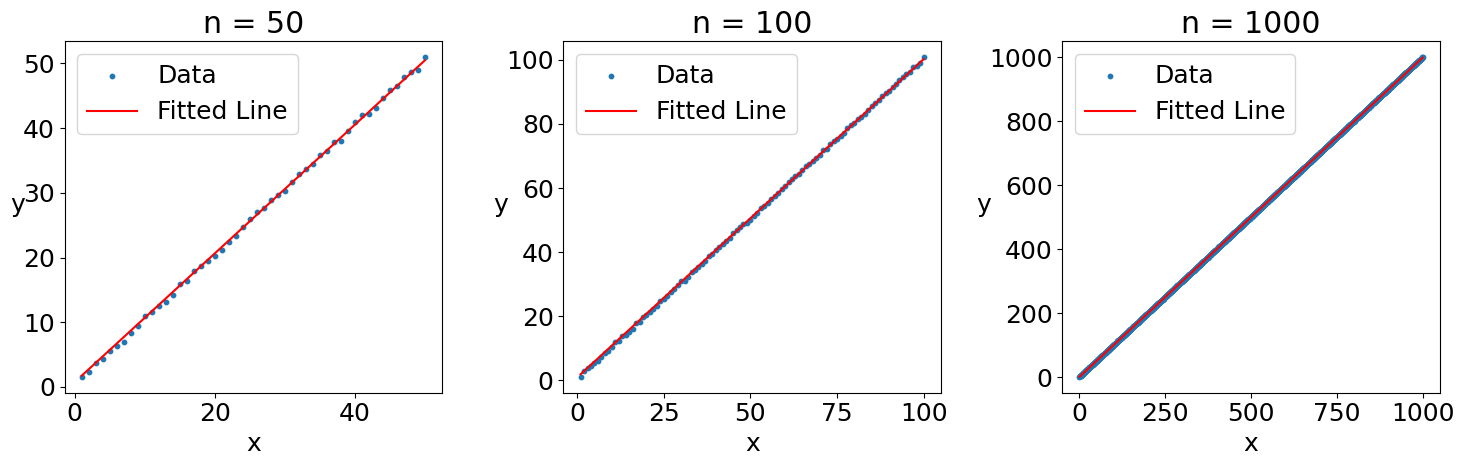

In [32]:

# DGP
def dgp(n):
    x = np.arange(start=1, stop=n+1)
    y = x + np.random.uniform(0,1, n)
    return x,y

# Linear regression
class LinearRegression:
    def __init__(self, gamma, method, mew=0, n_iters = 10000, eps=1e-5):
        self.gamma = gamma
        self.method = method
        self.mew = mew
        self.n_iters = n_iters
        self.eps = eps

    def loss(self):
        return np.mean((self.k * self.x + self.n - self.y)**2)
    
    def grad(self, par):
        dk = np.mean(2 * (par[0] * self.x + par[1] - self.y) * self.x)
        dn = np.mean(2 * (par[0] * self.x + par[1] - self.y))
        return np.array([dk,dn])
    
    def grad_sgd(self, par):
        ind = int(np.random.rand() * len(self.y))
        dk = 2 * (par[0] * self.x[ind] + par[1] - self.y[ind]) * self.x[ind]
        dn = 2 * (par[0] * self.x[ind] + par[1] - self.y[ind])
        return np.array([dk,dn])
    
    def hessian(self, par):
        return np.array([[np.mean(2 * self.x**2), np.mean(2 * self.x)],
                         [np.mean(2 * self.x), 2]])


    def fit(self, x_train, y_train):
        self.x = np.array(x_train)
        self.y = np.array(y_train)
        self.k, self.n = np.random.rand(), np.random.rand()

        start_time = time.perf_counter()  # Start timing
        
        if self.method == "GD":
            (self.k, self.n), i = gradient_descent(self.grad, [self.k, self.n],
                                                   gamma=self.gamma, n_iters=self.n_iters, eps=self.eps)
            
        if self.method == "SGD":
            (self.k, self.n), i = gradient_descent(self.grad_sgd, [self.k, self.n],
                                                    gamma=self.gamma, n_iters=self.n_iters, eps=self.eps)
        
        if self.method == "newton":
            (self.k, self.n), i = newton(self.grad, x_start=[self.k, self.n], hessian=self.hessian,
                                          n_iters=self.n_iters, eps=self.eps)
                
        if self.method == "bfgs":
            (self.k, self.n), i = bfgs(self.grad, x_start=[self.k, self.n],
                                       n_iters=self.n_iters, eps=self.eps)
            
        if self.method == "lbfgs":
            (self.k, self.n), i = l_bfgs(self.grad, x_start=[self.k, self.n], m=10,
                                         n_iters=self.n_iters, eps=self.eps)
            
        elapsed_time = time.perf_counter() - start_time  # Calculate elapsed time
        print(f"{self.method} took {i} iterations and {elapsed_time:.4f} seconds")
        
        return self.k, self.n
        


# Set global font size
plt.rcParams.update({'font.size': 18})  # This will apply to titles, labels, and ticks

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
n_values = [50, 100, 1000]
for i, n in enumerate(n_values):
    x, y = dgp(n)  # Generate data
    gamma = 1 / (n**2)  # Update gamma
    linreg = LinearRegression(gamma, "GD", n_iters=100000, eps=0.001)
    k, n_val = linreg.fit(x, y)  # Fit the model
    
    # Plot the results
    axs[i].scatter(x, y, s=10, label="Data")
    axs[i].plot(x, k * x + n_val, color="red", label="Fitted Line")
    axs[i].set_title(f"n = {n}")
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y", rotation=0)
    axs[i].legend()  # Add the legend

plt.tight_layout()
plt.savefig("report/figures/lin.png")


In [35]:
# Test for different values of n
n_values = [50, 100, 1000, 10000, 100000, 1000000]
methods = ["GD", "SGD", "newton", "bfgs", "lbfgs"]

for n in n_values:
    print(f"------------------------ Testing for n = {n} ------------------------")
    x, y = dgp(n)  # Generate data
    gamma = 1/(n**2)  # Set learning rate
    
    
    for method in methods:
        linreg = LinearRegression(gamma, method, n_iters=1000000, eps=0.00001) 
        k, n_ = linreg.fit(x, y)


------------------------ Testing for n = 50 ------------------------
GD took 751 iterations and 0.0304 seconds
SGD took 94 iterations and 0.0009 seconds
newton took 1 iterations and 0.0002 seconds
bfgs took 5 iterations and 0.0003 seconds
lbfgs took 7 iterations and 0.0004 seconds
------------------------ Testing for n = 100 ------------------------
GD took 9259 iterations and 0.3668 seconds
SGD took 210 iterations and 0.0021 seconds
newton took 1 iterations and 0.0002 seconds
bfgs took 3 iterations and 0.0002 seconds
lbfgs took 7 iterations and 0.0004 seconds
------------------------ Testing for n = 1000 ------------------------
GD took 10 iterations and 0.0013 seconds
SGD took 46 iterations and 0.0004 seconds
newton took 1 iterations and 0.0002 seconds
bfgs took 5 iterations and 0.0003 seconds
lbfgs took 3 iterations and 0.0002 seconds
------------------------ Testing for n = 10000 ------------------------
GD took 11 iterations and 0.0018 seconds
SGD took 8 iterations and 0.0001 seco

## Extra problem

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

block1 = np.array([[4, 1],
                   [1, 3]])


block2 = np.array([[2]])

block3 = np.array([[5]])


H = np.block([[block1, np.zeros((2, 1)), np.zeros((2, 1))],
              [np.zeros((1, 2)), block2, np.zeros((1, 1))],
              [np.zeros((1, 2)), np.zeros((1, 1)), block3]])

blocks = [block1, block2, block3]

def f(x): return x.T @ H @ x


def grad(x): return 2 * H @ x


def block_descent(blocks, x_start, gamma=0.001, n_iters=100000, eps=1e-7, timer=1e10, return_time=True):
    import time
    start = time.perf_counter()
    x_k = np.array(x_start, dtype=float)
    block_sizes = [block.shape[0] for block in blocks]
    indices = np.cumsum([0] + block_sizes)
    iter_num = 0

    while iter_num < n_iters:
        if time.perf_counter() - start > timer:
            return x_k, iter_num + 1

        for i, block in enumerate(blocks):
            start_idx, end_idx = indices[i], indices[i + 1]
            xi = x_k[start_idx:end_idx]


            grad_i = 2 * block @ xi

            x_k[start_idx:end_idx] = xi - gamma * grad_i

            iter_num += 1
            if np.linalg.norm(gamma * grad_i) < eps or iter_num >= n_iters:
                if return_time:
                    return x_k, iter_num, time.perf_counter() - start
                return x_k, iter_num

    if return_time:
        return x_k, iter_num, time.perf_counter() - start
    return x_k, iter_num


# Initial guess
x0 = np.array([0.5, 1.0, -1.0, -1.0])


x_opt = gradient_descent(grad, x0, return_time=True, gamma=0.01)
print(x_opt)
print(f(x_opt[0]))

x_opt = block_descent(blocks, x0, gamma=0.01)
print(x_opt)
print(f(x_opt[0]))

(array([-5.88902979e-08,  9.52865860e-08, -2.39872728e-06, -3.12518328e-15]), 318, 0.0040126999956555665)
1.1537673047890267e-11
(array([-4.66312221e-04,  7.59078976e-04, -4.38605420e-03, -8.20831010e-07]), 399, 0.004381200000352692)
4.036540170681356e-05
